=== Hallucinations Count Summary ===
count    83.000000
mean      3.855422
std       1.380461
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: hallucinations, dtype: float64

=== Hallucination Rate Summary ===
count    83.000000
mean      0.571827
std       0.198209
min       0.066667
25%       0.408333
50%       0.578947
75%       0.725000
max       0.950000
Name: hallucination_rate, dtype: float64


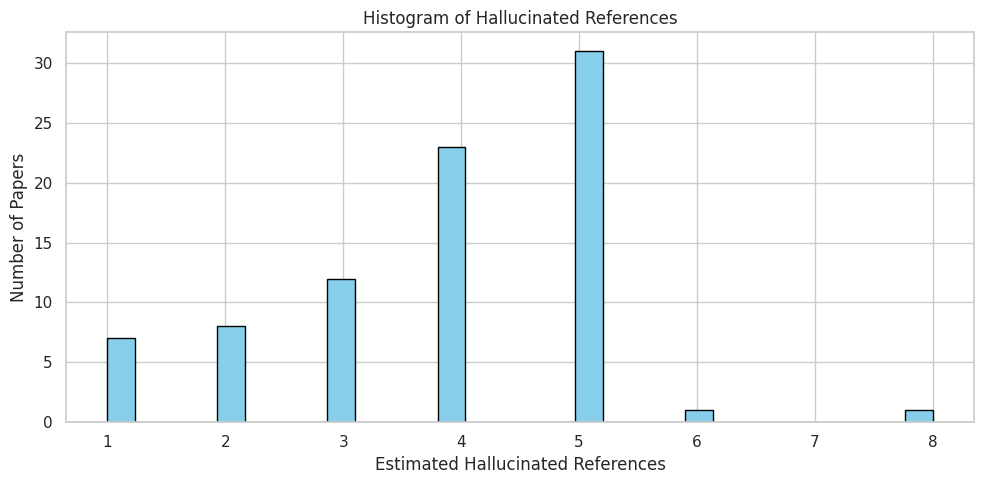

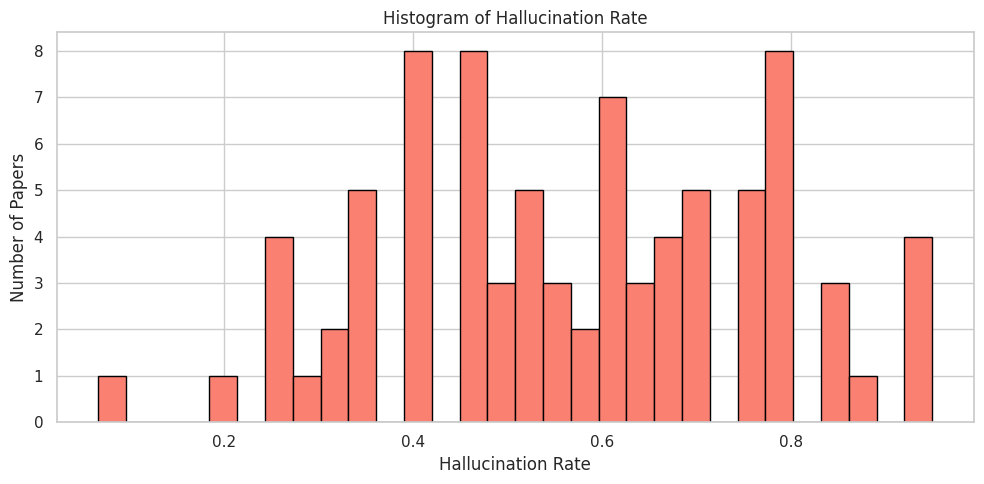


=== Top 10 Papers by Hallucination Rate ===
                                                title  hallucinations  \
19  Triboelectric tactile sensor for pressure and ...               1   
60  Unlocking Mechanisms for Soil Organic Matter A...               1   
50  Leveraging artificial intelligence and advance...               1   
63  Unlocking the potential of banana peel bioacti...               1   
64  Design prognostics for 4400 TEU container vess...               2   
25  Security and Privacy Challenges of Large Langu...               2   
78  From digital corporate social responsibility (...               3   
26  Realization of p-type MA-based perovskite sola...               3   
35  Sacrificing patient care for prevention: disto...               2   
48  Dark Matter Search Results from <mml:math xmln...               2   

    hallucination_rate  
19            0.950000  
60            0.950000  
50            0.947368  
63            0.933333  
64            0.866667  
2

In [79]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This code block analyzes hallucination rates in AI-generated bibliographies
# from a JSONL file containing metadata for multiple papers.

# Load the JSONL file where each line is a JSON object representing a paper's metadata
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    results = [json.loads(line) for line in f]

# Initialize lists to store extracted data for each paper
hallucinations = []       # Estimated count of hallucinated references per paper
hallucination_rates = []  # Hallucination rate (fraction of references hallucinated)
years = []                # Publication year of the paper
titles = []               # Title of the paper

# Loop through each paper's metadata to extract relevant information
for paper in results:
    hr = paper.get('hallucination_rate')             # Fraction of hallucinated references
    bibliography = paper.get('generated_bibliography', [])  # List of generated references
    y = paper.get('year')                             # Publication year
    t = paper.get('title', 'Unknown Title')          # Paper title, default if missing

    # Check if hallucination rate is present and bibliography is a non-empty list
    if hr is not None and isinstance(bibliography, list) and len(bibliography) > 0:
        # Calculate the estimated hallucinated references count by multiplying
        # hallucination rate by number of references, then rounding
        h = round(hr * len(bibliography))
        hallucinations.append(h)
        hallucination_rates.append(hr)
        years.append(y)
        titles.append(t)

# Create a DataFrame from the collected data for easier analysis
df = pd.DataFrame({
    'title': titles,
    'year': years,
    'hallucinations': hallucinations,
    'hallucination_rate': hallucination_rates
})

# Print summary statistics for hallucinated reference counts
print("=== Hallucinations Count Summary ===")
print(df['hallucinations'].describe())

# Print summary statistics for hallucination rates
print("\n=== Hallucination Rate Summary ===")
print(df['hallucination_rate'].describe())

# Plot 1: Histogram showing distribution of hallucinated reference counts across papers
plt.figure(figsize=(10, 5))
plt.hist(df['hallucinations'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Hallucinated References")
plt.xlabel("Estimated Hallucinated References")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Histogram showing distribution of hallucination rates across papers
plt.figure(figsize=(10, 5))
plt.hist(df['hallucination_rate'], bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of Hallucination Rate")
plt.xlabel("Hallucination Rate")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Line plot of average hallucination rate per publication year (if year data available)
if df['year'].notna().sum() > 0:
    # Group data by year and compute mean hallucination rate for each year
    df_yearly = df.groupby('year')['hallucination_rate'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(df_yearly['year'], df_yearly['hallucination_rate'], marker='o', linestyle='-')
    plt.title("Average Hallucination Rate by Year")
    plt.xlabel("Year")
    plt.ylabel("Average Hallucination Rate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Identify and display top 10 papers with the highest hallucination rates
top_papers = df.sort_values(by='hallucination_rate', ascending=False).head(10)
print("\n=== Top 10 Papers by Hallucination Rate ===")
print(top_papers[['title', 'hallucinations', 'hallucination_rate']])



Collected 7932 citation counts from real bibliographies.
Collected 648 citation counts from generated bibliographies.
Real cited papers - mean: 1215.49, median: 87.0, std: 10533.70
Generated cited papers - mean: 6969.33, median: 1825.5, std: 15082.48


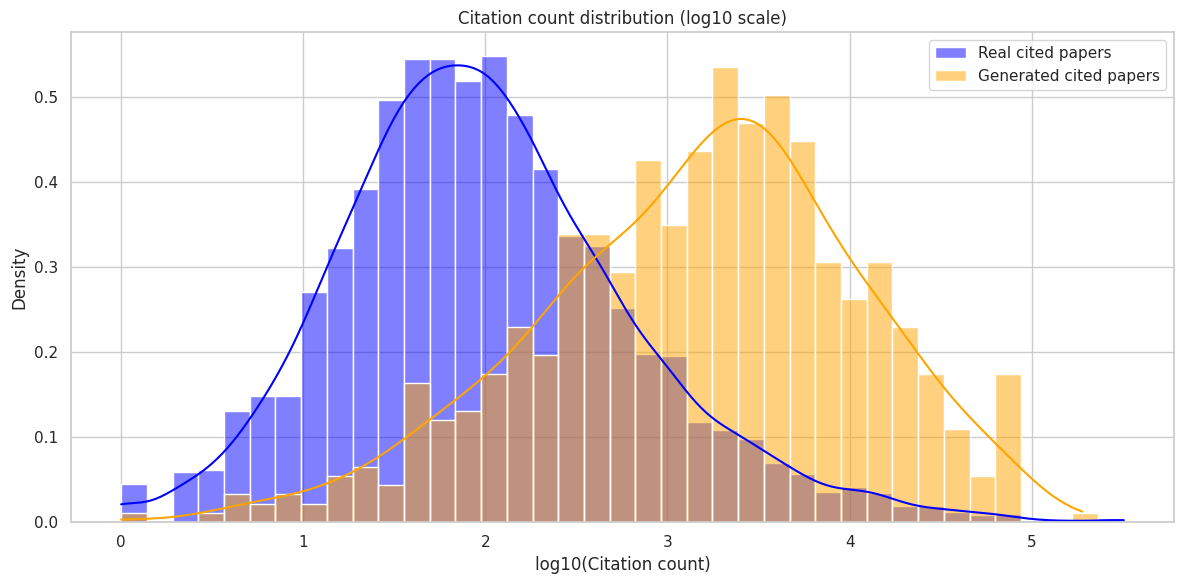

Mann-Whitney U test statistic: 849213.0
P-value: 0.0000
Significant difference in citation count distributions of cited papers.


In [80]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# This code analyzes and compares citation counts of references from
# real bibliographies and AI-generated bibliographies across papers.

# Load the full metadata JSONL file where each line contains a paper's metadata
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    results = [json.loads(line) for line in f]

# Initialize lists to store citation counts from real and generated bibliographies
real_cited_citations = []
gen_cited_citations = []

# Loop through each paper's metadata
for entry in results:
    # Extract citation counts from the 'real_bibliography' if available and valid (>0)
    for ref in entry.get('real_bibliography', []):
        cit_count = ref.get('citation_count')
        if cit_count is not None and cit_count > 0:
            real_cited_citations.append(cit_count)

    # Extract citation counts from the 'generated_bibliography' if available and valid (>0)
    for ref in entry.get('generated_bibliography', []):
        cit_count = ref.get('citation_count')
        if cit_count is not None and cit_count > 0:
            gen_cited_citations.append(cit_count)

# Print the total number of citation counts collected from each bibliography type
print(f"Collected {len(real_cited_citations)} citation counts from real bibliographies.")
print(f"Collected {len(gen_cited_citations)} citation counts from generated bibliographies.")

# Compute and print basic statistics: mean, median, and standard deviation of citation counts
print(f"Real cited papers - mean: {np.mean(real_cited_citations):.2f}, median: {np.median(real_cited_citations)}, std: {np.std(real_cited_citations):.2f}")
print(f"Generated cited papers - mean: {np.mean(gen_cited_citations):.2f}, median: {np.median(gen_cited_citations)}, std: {np.std(gen_cited_citations):.2f}")

# Apply log10 transformation to citation counts to reduce skewness and make distributions more comparable
real_log = np.log10(real_cited_citations)
gen_log = np.log10(gen_cited_citations)

# Plot histogram with KDE (Kernel Density Estimate) overlay for both real and generated citation counts (log scale)
plt.figure(figsize=(12, 6))
# Define common bins for both datasets for better comparison
bins = np.linspace(min(real_log.min(), gen_log.min()), max(real_log.max(), gen_log.max()), 40)

# Plot histogram + KDE for real cited papers (blue, semi-transparent)
sns.histplot(real_log, bins=bins, kde=True, stat='density', label='Real cited papers', color='blue', alpha=0.5)

# Plot histogram + KDE for generated cited papers (orange, semi-transparent)
sns.histplot(gen_log, bins=bins, kde=True, stat='density', label='Generated cited papers', color='orange', alpha=0.5)

# Set plot labels and title
plt.xlabel('log10(Citation count)')
plt.ylabel('Density')
plt.title('Citation count distribution (log10 scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test (non-parametric) to test whether the two citation count distributions differ significantly
# Use raw citation counts (not log-transformed) for the test
stat, p_value = mannwhitneyu(real_cited_citations, gen_cited_citations, alternative='two-sided')

# Print test statistic and p-value
print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value with standard 0.05 significance level threshold
if p_value < 0.05:
    print("Significant difference in citation count distributions of cited papers.")
else:
    print("No significant difference found in citation count distributions of cited papers.")


In [27]:
from scipy.stats import skew, kurtosis

print(f"Skewness (real): {skew(real_cited_citations):.2f}")
print(f"Kurtosis (real): {kurtosis(real_cited_citations, fisher=True):.2f}")

print(f"Skewness (generated): {skew(gen_cited_citations):.2f}")
print(f"Kurtosis (generated): {kurtosis(gen_cited_citations, fisher=True):.2f}")

Skewness (real): 23.88
Kurtosis (real): 673.19
Skewness (generated): 5.02
Kurtosis (generated): 39.03


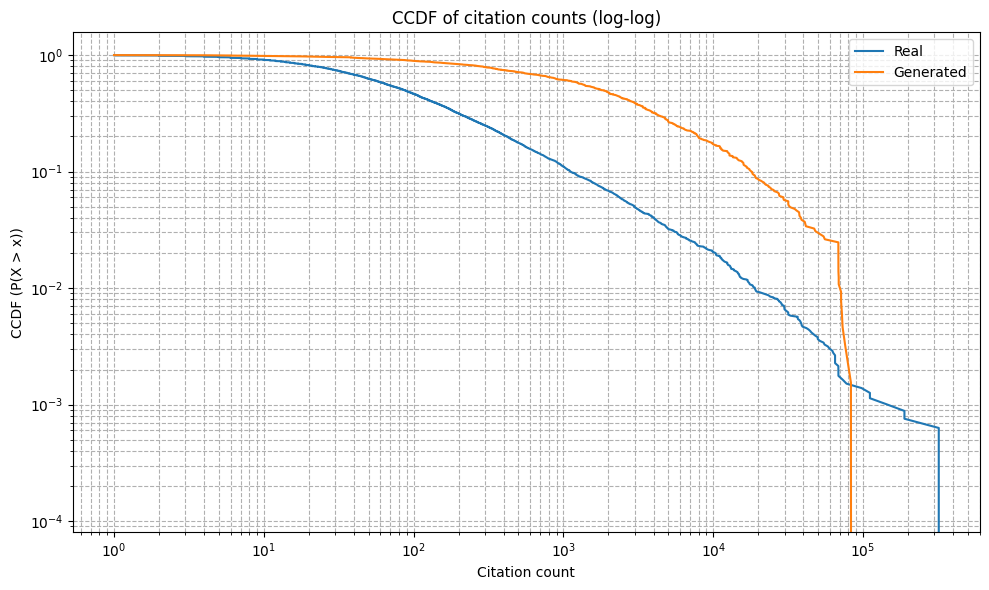

In [26]:
def plot_ccdf(data, label):
    sorted_data = np.sort(data)
    ccdf = 1. - np.arange(1, len(data)+1) / len(data)
    plt.loglog(sorted_data, ccdf, label=label)

plt.figure(figsize=(10, 6))
plot_ccdf(real_cited_citations, "Real")
plot_ccdf(gen_cited_citations, "Generated")
plt.xlabel("Citation count")
plt.ylabel("CCDF (P(X > x))")
plt.title("CCDF of citation counts (log-log)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


In [9]:
import powerlaw

fit_real = powerlaw.Fit(real_cited_citations)
print(f"Estimated alpha (real): {fit_real.alpha:.2f}")
print(f"Power-law xmin (real): {fit_real.xmin}")

fit_gen = powerlaw.Fit(gen_cited_citations)
print(f"Estimated alpha (generated): {fit_gen.alpha:.2f}")
print(f"Power-law xmin (generated): {fit_gen.xmin}")

Calculating best minimal value for power law fit
Estimated alpha (real): 1.70
Power-law xmin (real): 241.0
Calculating best minimal value for power law fit
Estimated alpha (generated): 2.28
Power-law xmin (generated): 12399.0


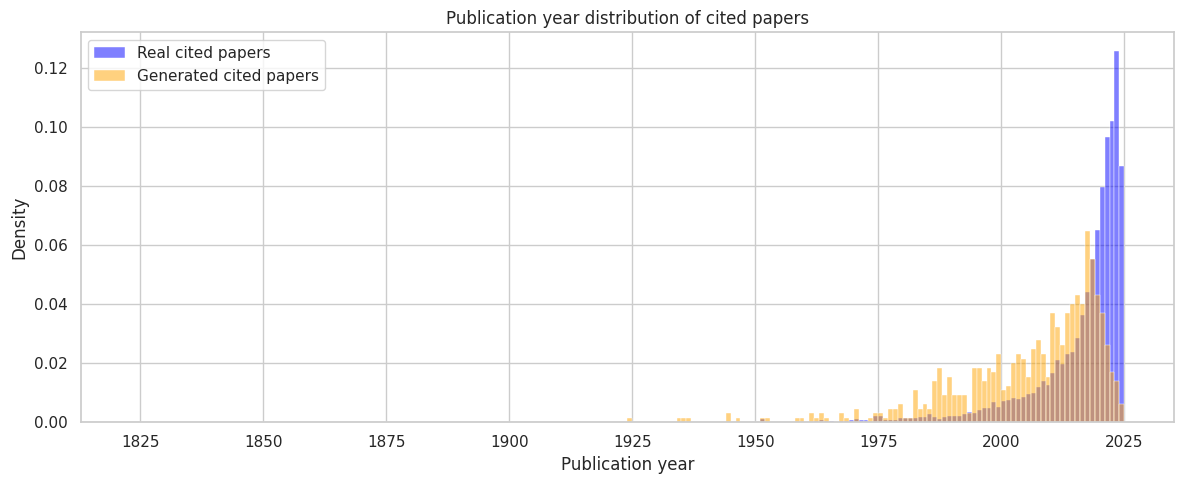

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to hold publication years from real and generated bibliographies
real_years = []
gen_years = []

# Loop through each paper's metadata to extract publication years of cited references
for entry in results:
    # Extract publication years from real bibliographies if available
    for ref in entry.get('real_bibliography', []):
        year = ref.get('year')
        if year is not None:  # Only consider valid years (not None)
            real_years.append(year)

    # Extract publication years from generated bibliographies if available
    for ref in entry.get('generated_bibliography', []):
        year = ref.get('year')
        if year is not None:
            gen_years.append(year)

# At this point, real_years and gen_years contain publication years of cited references
# from the real and generated bibliographies, respectively.

# Plotting the distribution of publication years of cited papers from both real and generated bibliographies
plt.figure(figsize=(12, 5))

# Create bins for the histogram spanning the full range of years found in both datasets
bins = np.arange(min(real_years + gen_years), max(real_years + gen_years) + 1)

# Plot histogram (density normalized) for real cited paper publication years
sns.histplot(real_years, bins=bins, kde=False, stat='density',
             label='Real cited papers', color='blue', alpha=0.5)

# Plot histogram (density normalized) for generated cited paper publication years
sns.histplot(gen_years, bins=bins, kde=False, stat='density',
             label='Generated cited papers', color='orange', alpha=0.5)

# Label the axes and set plot title
plt.xlabel('Publication year')
plt.ylabel('Density')
plt.title('Publication year distribution of cited papers')

# Add legend to distinguish between real and generated data
plt.legend()

# Add grid for easier reading of the plot
plt.grid(True)

# Adjust layout to avoid clipping elements
plt.tight_layout()

# Display the plot
plt.show()


In [83]:
# Check for papers cited with publication year 1825
target_year = 1823

for entry in results:
    for ref in entry.get('real_bibliography', []):
        if ref.get('year') == target_year:
            print("Real bibliography paper from 1825 found:")
            print(json.dumps(ref, indent=2))
    for ref in entry.get('generated_bibliography', []):
        if ref.get('year') == target_year:
            print("Generated bibliography paper from 1825 found:")
            print(json.dumps(ref, indent=2))


Real bibliography paper from 1825 found:
{
  "title": "MR. SCOTT'S REPLY TO MR. ALCOCK.",
  "authors": [
    {
      "name": "NA NA",
      "id": "https://openalex.org/A5065421650"
    }
  ],
  "year": 1823,
  "venue": "The Lancet",
  "citation_count": 119
}


In [87]:
import pandas as pd
import numpy as np

# Define a function that computes summary statistics for a list/array of years
def summarize_years(years):
    return {
        'mean': np.mean(years),               # Average publication year
        'median': np.median(years),           # Median publication year
        'std': np.std(years),                 # Standard deviation (spread) of years
        'min': np.min(years),                 # Earliest publication year
        'max': np.max(years),                 # Latest publication year
        '25%': np.percentile(years, 25),     # 25th percentile (first quartile)
        '75%': np.percentile(years, 75),     # 75th percentile (third quartile)
        'IQR': np.percentile(years, 75) - np.percentile(years, 25)  # Interquartile range (spread of middle 50%)
    }

# Compute summary statistics for real cited paper years
real_summary = summarize_years(real_years)

# Compute summary statistics for generated cited paper years
gen_summary = summarize_years(gen_years)

# Combine both summaries into a DataFrame with 'Real' and 'Generated' as columns
summary_df = pd.DataFrame({'Real': real_summary, 'Generated': gen_summary})

# Transpose the DataFrame so the metrics become rows and bibliography types become columns
summary_df = summary_df.T

# Print the resulting summary statistics table
print(summary_df)



                  mean  median        std     min     max     25%     75%  \
Real       2015.438422  2019.0  11.362456  1823.0  2025.0  2013.0  2022.0   
Generated  2005.351310  2010.0  15.268420  1924.0  2025.0  1998.0  2017.0   

            IQR  
Real        9.0  
Generated  19.0  


        paper_id   real_size   gen_size  intersection       union    jaccard  \
count  99.000000   99.000000  99.000000     99.000000   99.000000  99.000000   
mean   49.616162   79.727273   6.434343      0.616162   85.545455   0.008618   
std    29.135751  107.378961   4.531436      1.075773  106.991634   0.013685   
min     0.000000    3.000000   0.000000      0.000000    5.000000   0.000000   
25%    24.500000   25.500000   3.000000      0.000000   32.000000   0.000000   
50%    50.000000   50.000000   7.000000      0.000000   58.000000   0.000000   
75%    74.500000   93.000000  10.000000      1.000000   96.000000   0.016878   
max    99.000000  859.000000  15.000000      7.000000  864.000000   0.052632   

         overlap  
count  99.000000  
mean    0.095013  
std     0.187474  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.125000  
max     1.000000  


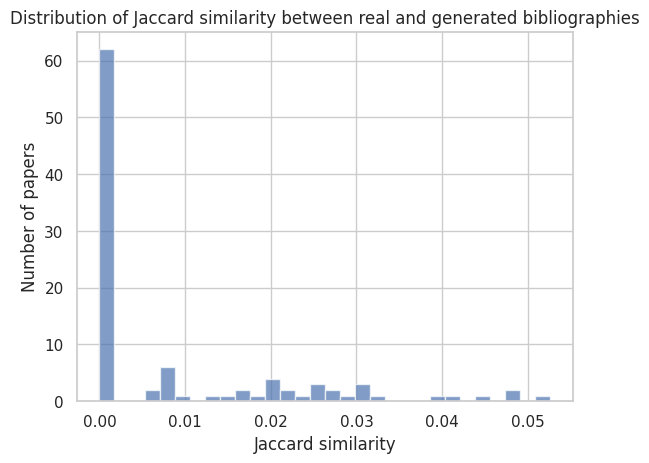

In [88]:
"""
This script analyzes the similarity between real and AI-generated bibliographies 
for a collection of research papers. 

It reads a JSONL file where each entry contains metadata for a paper, including 
its real bibliography and a generated bibliography. For each paper, it extracts 
the titles from both bibliographies, normalizes them, and computes similarity metrics 
between the two sets of titles: the Jaccard similarity and the Overlap coefficient. 

Finally, it summarizes the similarity metrics over all papers and visualizes the 
distribution of the Jaccard similarity scores using a histogram.
"""

import json
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the JSONL file containing metadata for papers including their real and generated bibliographies
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    results = [json.loads(line) for line in f]

# Function to normalize titles:
# - lowercase all letters
# - trim leading/trailing whitespace
# - collapse multiple spaces to a single space
# - remove punctuation characters for consistency
def normalize_title(title):
    title = title.lower().strip()
    title = re.sub(r'\s+', ' ', title)  # Normalize whitespace to single spaces
    title = re.sub(r'[^\w\s]', '', title)  # Remove punctuation (anything that's not word or space)
    return title

# Compute Jaccard similarity between two sets:
# Jaccard similarity = (size of intersection) / (size of union)
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Compute Overlap Coefficient between two sets:
# Overlap coefficient = (size of intersection) / (size of smaller set)
def overlap_coefficient(set1, set2):
    intersection = len(set1.intersection(set2))
    min_size = min(len(set1), len(set2))
    return intersection / min_size if min_size != 0 else 0

results_metrics = []  # List to store similarity metrics for each paper

# For each paper entry in the dataset...
for entry in results:
    # Extract and normalize titles from real bibliography, skipping entries without titles
    real_titles = set(
        normalize_title(ref.get('title', '')) 
        for ref in entry.get('real_bibliography', []) 
        if ref.get('title')
    )
    # Extract and normalize titles from generated bibliography, skipping entries without titles
    gen_titles = set(
        normalize_title(ref.get('title', '')) 
        for ref in entry.get('generated_bibliography', []) 
        if ref.get('title')
    )
    
    # Calculate size of intersection and union of real and generated title sets
    inter = len(real_titles.intersection(gen_titles))
    union = len(real_titles.union(gen_titles))
    
    # Calculate Jaccard similarity and overlap coefficient between title sets
    jaccard = jaccard_similarity(real_titles, gen_titles)
    overlap = overlap_coefficient(real_titles, gen_titles)
    
    # Store metrics along with paper identifier and size info for later analysis
    results_metrics.append({
        'paper_id': entry.get('paper_id', None),
        'real_size': len(real_titles),  # Number of unique titles in real bibliography
        'gen_size': len(gen_titles),    # Number of unique titles in generated bibliography
        'intersection': inter,           # Number of titles common to both sets
        'union': union,                  # Number of unique titles in either set
        'jaccard': jaccard,              # Jaccard similarity score
        'overlap': overlap               # Overlap coefficient score
    })

# Convert the list of dictionaries into a Pandas DataFrame for easier analysis
df_metrics = pd.DataFrame(results_metrics)

# Print summary statistics (count, mean, std, min, max, quartiles) for all computed metrics
print(df_metrics.describe())

# Plot a histogram of the Jaccard similarity scores across all papers
plt.hist(df_metrics['jaccard'], bins=30, alpha=0.7)
plt.xlabel('Jaccard similarity')
plt.ylabel('Number of papers')
plt.title('Distribution of Jaccard similarity between real and generated bibliographies')
plt.show()


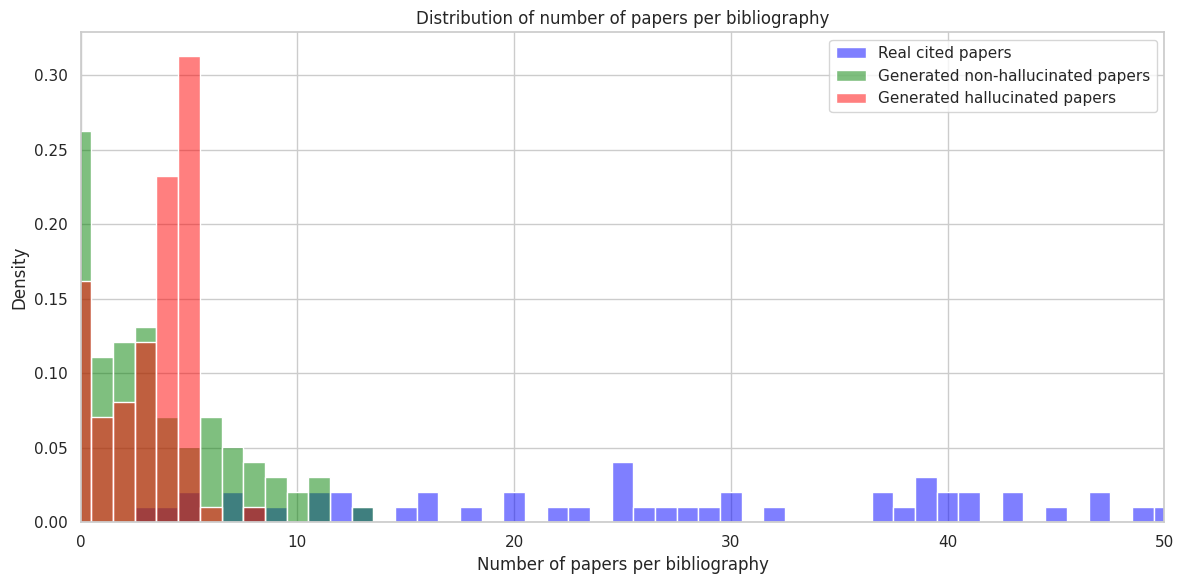

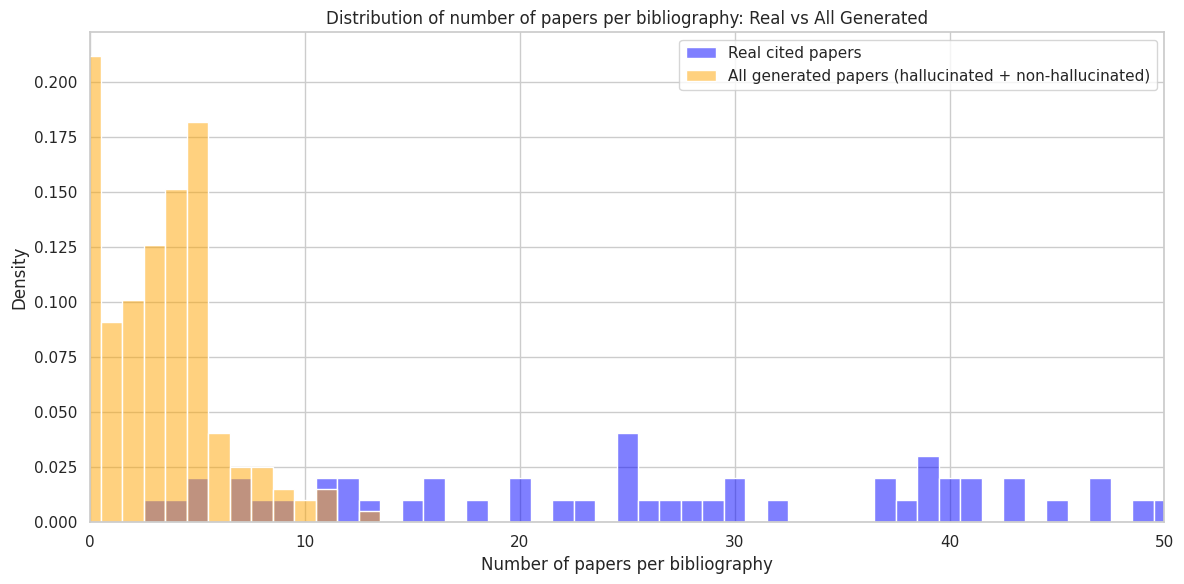

In [93]:
"""
This script analyzes and compares the distribution of the number of cited papers 
per bibliography across three categories: 

1. Real bibliographies (actual cited papers),
2. Generated bibliographies' non-hallucinated citations (those considered accurate),
3. Generated bibliographies' hallucinated citations (fabricated or incorrect citations).

It visualizes these distributions with density histograms, allowing us to see 
how the number of cited papers differs between real references and AI-generated ones, 
including a combined view of all generated citations.
"""

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

real_num_cited = []
gen_num_non_hallucinated = []
gen_num_hallucinated = []

# Iterate over each paper entry in the dataset
for entry in results:
    # Extract the list of real cited references and count them
    real_refs = entry.get('real_bibliography', [])
    real_num_cited.append(len(real_refs))

    # Extract the list of generated references and hallucination rate
    gen_refs = entry.get('generated_bibliography', [])
    halluc_rate = entry.get('hallucination_rate', 0.0)  # Defaults to 0 if missing
    total_gen = len(gen_refs)

    # Calculate the number of hallucinated and non-hallucinated references
    num_hall = int(round(halluc_rate * total_gen))
    num_non_hall = total_gen - num_hall

    # Store counts in their respective lists
    gen_num_hallucinated.append(num_hall)
    gen_num_non_hallucinated.append(num_non_hall)


# Plot 1: Histogram comparing distributions of real, generated non-hallucinated, and hallucinated citations
plt.figure(figsize=(12, 6))

# Define bins for the histogram to cover range of citation counts across all groups
bins = np.arange(0, max(
    max(real_num_cited, default=0),
    max(gen_num_non_hallucinated, default=0),
    max(gen_num_hallucinated, default=0)
) + 2) - 0.5  # Shift bins by 0.5 for better alignment of integer counts on x-axis

plt.xlim(0, 50)  # Limit x-axis to a max of 50 for clearer visualization

# Plot real citations distribution
sns.histplot(real_num_cited, bins=bins, kde=False, stat='density',
             label='Real cited papers', color='blue', alpha=0.5)

# Plot generated non-hallucinated citations distribution
sns.histplot(gen_num_non_hallucinated, bins=bins, kde=False, stat='density',
             label='Generated non-hallucinated papers', color='green', alpha=0.5)

# Plot generated hallucinated citations distribution
sns.histplot(gen_num_hallucinated, bins=bins, kde=False, stat='density',
             label='Generated hallucinated papers', color='red', alpha=0.5)

plt.xlabel('Number of papers per bibliography')
plt.ylabel('Density')
plt.title('Distribution of number of papers per bibliography')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Combine hallucinated and non-hallucinated generated citations into a single list
gen_all = gen_num_non_hallucinated + gen_num_hallucinated

# Plot 2: Histogram comparing real citations vs all generated citations combined
plt.figure(figsize=(12, 6))

# Define bins based on the max counts across real and combined generated citations
bins = np.arange(0, max(
    max(real_num_cited, default=0),
    max(gen_all, default=0)
) + 2) - 0.5

plt.xlim(0, 50)

# Plot real citations distribution
sns.histplot(real_num_cited, bins=bins, kde=False, stat='density',
             label='Real cited papers', color='blue', alpha=0.5)

# Plot all generated citations distribution (hallucinated + non-hallucinated)
sns.histplot(gen_all, bins=bins, kde=False, stat='density',
             label='All generated papers (hallucinated + non-hallucinated)', color='orange', alpha=0.5)

plt.xlabel('Number of papers per bibliography')
plt.ylabel('Density')
plt.title('Distribution of number of papers per bibliography: Real vs All Generated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



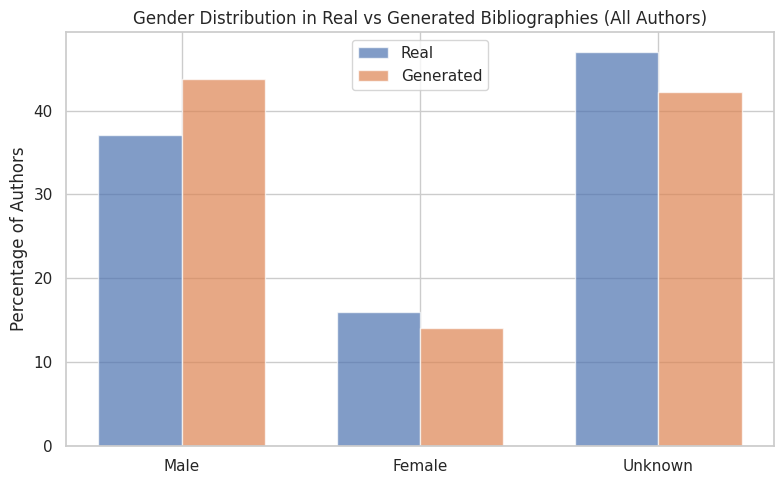

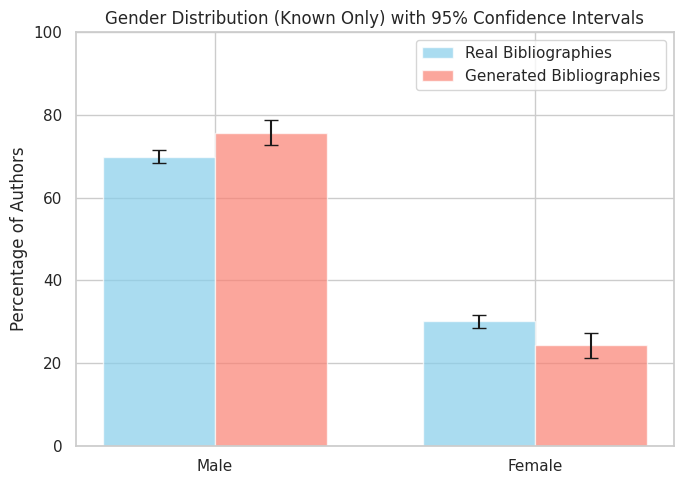


=== Gender Distribution (Total Counts) ===
Real Bibliographies: {'real_male': 2479, 'real_female': 1066, 'real_unknown': 3143}
Generated Bibliographies: {'gen_male': 592, 'gen_female': 190, 'gen_unknown': 572}

=== Gender Distribution (Percentages, All Authors) ===
Real Bibliographies: {'real_male': '37.07%', 'real_female': '15.94%', 'real_unknown': '46.99%'}
Generated Bibliographies: {'gen_male': '43.72%', 'gen_female': '14.03%', 'gen_unknown': '42.25%'}

=== Gender Distribution (Percentages with 95% CI, Known Genders Only) ===
Real Bibliographies:
  Male:   69.93% [68.42%, 71.44%]
  Female: 30.07% [28.56%, 31.58%]

Generated Bibliographies:
  Male:   75.70% [72.70%, 78.71%]
  Female: 24.30% [21.29%, 27.30%]


In [94]:
"""
This script loads author gender metadata from a JSONL dataset containing 
both real and AI-generated bibliographies. It analyzes the gender distribution 
of authors by counting male, female, and unknown gender labels in both real and generated bibliographies.

The script computes overall gender proportions (including unknowns) and also focuses on known genders only,
calculating 95% confidence intervals for the proportions.

Finally, it visualizes the distributions in bar plots for both the full dataset (all authors)
and the subset with known genders only, providing a comparative view of real vs generated bibliographies.
"""

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# --- Load JSONL file ---
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    results = [json.loads(line) for line in f]

# --- Helper function to count genders from author metadata ---
def count_genders(author_metadata):
    """
    Counts occurrences of gender categories ('male', 'female', 'unknown') in a list of authors.

    Parameters:
        author_metadata (list): List of dictionaries with author info, including a 'gender' key.

    Returns:
        Counter: Counts of genders found in the author list.
    """
    counter = Counter()
    for author in author_metadata:
        # Use lowercase to normalize gender strings, defaulting to 'unknown' if missing
        gender = author.get("gender", "unknown").lower()
        counter[gender] += 1
    return counter

# --- Aggregate gender counts for all papers ---
all_gender_data = []

for entry in results:
    paper_id = entry.get("paper_id")

    # Extract author metadata for real and generated bibliographies
    real_authors = entry.get("real_analysis", {}).get("author_metadata", [])
    gen_authors = entry.get("generated_analysis", {}).get("author_metadata", [])

    # Count genders in both real and generated authorship lists
    real_gender_counts = count_genders(real_authors)
    gen_gender_counts = count_genders(gen_authors)

    # Append aggregated counts per paper to a list for DataFrame creation
    all_gender_data.append({
        "paper_id": paper_id,
        "real_male": real_gender_counts.get("male", 0),
        "real_female": real_gender_counts.get("female", 0),
        "real_unknown": real_gender_counts.get("unknown", 0),
        "gen_male": gen_gender_counts.get("male", 0),
        "gen_female": gen_gender_counts.get("female", 0),
        "gen_unknown": gen_gender_counts.get("unknown", 0),
    })

# Convert list of dictionaries to a DataFrame for convenient analysis
gender_df = pd.DataFrame(all_gender_data)

# --- Compute totals across all papers ---
totals = {
    "real": gender_df[["real_male", "real_female", "real_unknown"]].sum(),
    "generated": gender_df[["gen_male", "gen_female", "gen_unknown"]].sum()
}

# --- Compute percentage distributions including unknown gender category ---
def compute_percentages(counts):
    """
    Computes percentage share of each gender category given counts.

    Parameters:
        counts (dict): Counts of gender categories.

    Returns:
        dict: Percentage of each category (sum to 100% if total > 0).
    """
    total = sum(counts.values())
    return {k: (v / total * 100 if total > 0 else 0) for k, v in counts.items()}

real_percent_all = compute_percentages(totals["real"].to_dict())
gen_percent_all = compute_percentages(totals["generated"].to_dict())

# --- Function to calculate 95% confidence intervals for proportions ---
def proportion_ci(k, n, confidence=0.95):
    """
    Calculates proportion and its confidence interval using normal approximation.

    Parameters:
        k (int): Count of successes (e.g., male authors).
        n (int): Total number of trials (e.g., all known gender authors).
        confidence (float): Confidence level (default 0.95).

    Returns:
        tuple: (proportion_percent, lower_bound_percent, upper_bound_percent)
    """
    if n == 0:
        return 0, 0, 0
    p = k / n
    z = 1.96  # z-score for 95% confidence
    se = np.sqrt(p * (1 - p) / n)  # standard error
    lower = max(0, p - z * se)
    upper = min(1, p + z * se)
    return p * 100, lower * 100, upper * 100

# Extract counts of known gender authors (excluding unknown)
real_male = totals["real"]["real_male"]
real_female = totals["real"]["real_female"]
real_known_total = real_male + real_female

gen_male = totals["generated"]["gen_male"]
gen_female = totals["generated"]["gen_female"]
gen_known_total = gen_male + gen_female

# Calculate percentages and confidence intervals for known genders only
real_male_pct, real_male_lower, real_male_upper = proportion_ci(real_male, real_known_total)
real_female_pct, real_female_lower, real_female_upper = proportion_ci(real_female, real_known_total)

gen_male_pct, gen_male_lower, gen_male_upper = proportion_ci(gen_male, gen_known_total)
gen_female_pct, gen_female_lower, gen_female_upper = proportion_ci(gen_female, gen_known_total)

# --- Plot 1: Gender distribution including unknown authors ---
labels = ['Male', 'Female', 'Unknown']

real_vals_all = [real_percent_all.get("real_male", 0), real_percent_all.get("real_female", 0), real_percent_all.get("real_unknown", 0)]
gen_vals_all = [gen_percent_all.get("gen_male", 0), gen_percent_all.get("gen_female", 0), gen_percent_all.get("gen_unknown", 0)]

x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, real_vals_all, width=bar_width, label='Real', alpha=0.7)
plt.bar([i + bar_width for i in x], gen_vals_all, width=bar_width, label='Generated', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in x], labels)
plt.ylabel('Percentage of Authors')
plt.title('Gender Distribution in Real vs Generated Bibliographies (All Authors)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Known genders only with 95% confidence intervals ---
labels_known = ['Male', 'Female']
real_vals_known = [real_male_pct, real_female_pct]
real_err_known = [real_male_upper - real_male_pct, real_female_upper - real_female_pct]

gen_vals_known = [gen_male_pct, gen_female_pct]
gen_err_known = [gen_male_upper - gen_male_pct, gen_female_upper - gen_female_pct]

x_known = np.arange(len(labels_known))

plt.figure(figsize=(7, 5))
plt.bar(
    x_known,
    real_vals_known,
    width=bar_width,
    yerr=real_err_known,
    capsize=5,
    label='Real Bibliographies',
    alpha=0.7,
    color='skyblue',
)
plt.bar(
    x_known + bar_width,
    gen_vals_known,
    width=bar_width,
    yerr=gen_err_known,
    capsize=5,
    label='Generated Bibliographies',
    alpha=0.7,
    color='salmon',
)
plt.xticks(x_known + bar_width / 2, labels_known)
plt.ylabel('Percentage of Authors')
plt.title('Gender Distribution (Known Only) with 95% Confidence Intervals')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

# --- Print summary tables ---
print("\n=== Gender Distribution (Total Counts) ===")
print("Real Bibliographies:", totals["real"].to_dict())
print("Generated Bibliographies:", totals["generated"].to_dict())

print("\n=== Gender Distribution (Percentages, All Authors) ===")
print("Real Bibliographies:", {k: f"{v:.2f}%" for k,v in real_percent_all.items()})
print("Generated Bibliographies:", {k: f"{v:.2f}%" for k,v in gen_percent_all.items()})

print("\n=== Gender Distribution (Percentages with 95% CI, Known Genders Only) ===")
print("Real Bibliographies:")
print(f"  Male:   {real_male_pct:.2f}% [{real_male_lower:.2f}%, {real_male_upper:.2f}%]")
print(f"  Female: {real_female_pct:.2f}% [{real_female_lower:.2f}%, {real_female_upper:.2f}%]\n")

print("Generated Bibliographies:")
print(f"  Male:   {gen_male_pct:.2f}% [{gen_male_lower:.2f}%, {gen_male_upper:.2f}%]")
print(f"  Female: {gen_female_pct:.2f}% [{gen_female_lower:.2f}%, {gen_female_upper:.2f}%]")


In [66]:
import json
import requests
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt
import seaborn as sns

def get_author_openalex_id(name):
    url = f"https://api.openalex.org/authors?search={name}&per-page=1"
    try:
        r = requests.get(url)
        r.raise_for_status()
        results = r.json().get('results', [])
        if results:
            return results[0]['id']
    except Exception as e:
        print(f"[ID Error] {name}: {e}")
    return None

def get_author_works_citations(openalex_id):
    url = f"https://api.openalex.org/works?filter=author.id:{openalex_id}&per-page=200"
    citations = []
    try:
        while url:
            r = requests.get(url)
            r.raise_for_status()
            data = r.json()
            for work in data['results']:
                if 'cited_by_count' in work:
                    citations.append(work['cited_by_count'])
            next_cursor = data['meta'].get('next_cursor')
            if next_cursor:
                url = f"https://api.openalex.org/works?filter=author.id:{openalex_id}&per-page=200&cursor={next_cursor}"
            else:
                url = None
            time.sleep(1)
    except Exception as e:
        print(f"[Works Error] {openalex_id}: {e}")
    return citations

def compute_h_index(citations):
    citations.sort(reverse=True)
    h = 0
    for i, c in enumerate(citations):
        if c >= i + 1:
            h = i + 1
        else:
            break
    return h

def process_author(author):
    openalex_id = get_author_openalex_id(author)
    if openalex_id:
        citations = get_author_works_citations(openalex_id)
        h_index = compute_h_index(citations)
        return author, h_index
    else:
        return author, None

# Load JSONL
real_authors = set()
generated_authors = set()
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        paper = json.loads(line)
        real_authors.update(
            a["name"] for a in paper.get("real_analysis", {}).get("author_metadata", []) if "name" in a
        )
        generated_authors.update(
            a["name"] for a in paper.get("generated_analysis", {}).get("author_metadata", []) if "name" in a
        )

all_authors = list(real_authors.union(generated_authors))

author_hindex = {}

MAX_WORKERS = 5
with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
    futures = {executor.submit(process_author, author): author for author in all_authors}
    for future in as_completed(futures):
        author, h_index = future.result()
        author_hindex[author] = h_index
        #print(f"Processed {author} -> h-index: {h_index}")

# Save results to JSON file
with open("authors_hindex.json", "w", encoding="utf-8") as outfile:
    json.dump(author_hindex, outfile, indent=2, ensure_ascii=False)

# Prepare distributions
real_hindex = [author_hindex[a] for a in real_authors if author_hindex.get(a) is not None]
generated_hindex = [author_hindex[a] for a in generated_authors if author_hindex.get(a) is not None]

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(real_hindex, label="Real Authors", fill=True)
sns.kdeplot(generated_hindex, label="Generated Authors", fill=True)
plt.xlabel("H-index")
plt.ylabel("Density")
plt.title("H-index Distribution: Real vs Generated Authors (from OpenAlex, parallelized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[ID Error] Lihong V. Wang: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Lihong%20V.%20Wang&per-page=1
[ID Error] Kerry Haynes: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Kerry%20Haynes&per-page=1
[Works Error] https://openalex.org/A5060967626: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/works?filter=author.id:https://openalex.org/A5060967626&per-page=200
[ID Error] Kaiming He: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Kaiming%20He&per-page=1
[ID Error] Franck Zinzindohoué: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Franck%20Zinzindohou%C3%A9&per-page=1
[Works Error] https://openalex.org/A5107896153: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/works?filter=author.id:https://openalex.org/A5107896153&per-page=200
[Works Error] https://openalex.org/A5018536426: 429 Client Er

KeyboardInterrupt: 

[ID Error] Travis A. Cole: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Travis%20A.%20Cole&per-page=1
[Works Error] https://openalex.org/A5006687149: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/works?filter=author.id:https://openalex.org/A5006687149&per-page=200
[ID Error] Shigeo Maruyama: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Shigeo%20Maruyama&per-page=1
[ID Error] Benno H. ter Kuile: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Benno%20H.%20ter%20Kuile&per-page=1
[Works Error] https://openalex.org/A5000655439: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/works?filter=author.id:https://openalex.org/A5000655439&per-page=200
[ID Error] Gregory A. Jicha: 429 Client Error: TOO MANY REQUESTS for url: https://api.openalex.org/authors?search=Gregory%20A.%20Jicha&per-page=1
[ID Error] Hang Wu: 429 Client Error: TOO MA

Columns in SCImago data: ['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile', 'H index', 'Total Docs. (2024)', 'Total Docs. (3years)', 'Total Refs.', 'Total Citations (3years)', 'Citable Docs. (3years)', 'Citations / Doc. (2years)', 'Ref. / Doc.', '%Female', 'Overton', 'SDG', 'Country', 'Region', 'Publisher', 'Coverage', 'Categories', 'Areas']
Could not match 650 out of 7600 venues.
Could not match 101 out of 539 venues.
Real SJR scores collected: 6950
Generated SJR scores collected: 438
Real bibliography SJR scores: mean = 3.2987, std = 4.7282
Generated bibliography SJR scores: mean = 4.8142, std = 6.1482


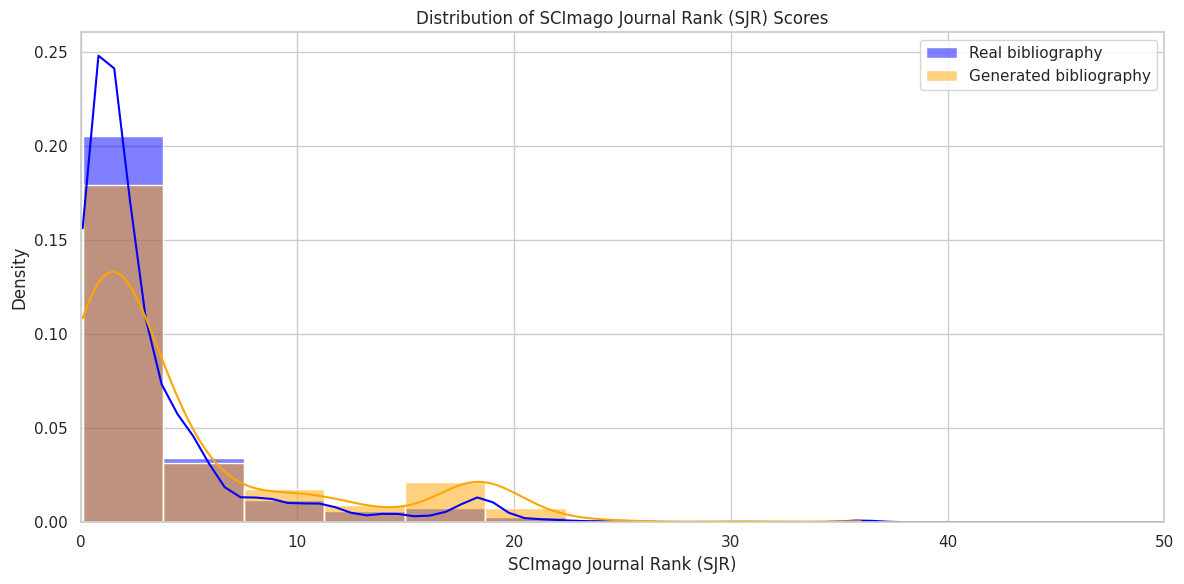

Mann-Whitney U test statistic: 1378027.0
P-value: 0.0009
Significant difference in SJR score distributions between real and generated bibliography venues.


In [70]:
"""
This script compares the scientific quality of venues cited in real bibliographies versus AI-generated bibliographies.

It uses the SCImago Journal Rank (SJR) dataset to assign a quality score to each venue (journal or conference) mentioned 
in the bibliographies. The bibliographies are loaded from a JSONL file containing both real and generated references.

Main steps:
1. Load the SCImago dataset containing venue titles and their SJR scores.
2. Load bibliographic metadata with lists of venues from both real and generated bibliographies.
3. Extract venue names and map them to SCImago titles using fuzzy matching to handle minor name differences.
4. Retrieve the corresponding SJR scores for each matched venue.
5. Visualize and compare the distributions of SJR scores between real and generated bibliographies.
6. Perform a Mann-Whitney U test to assess if there is a statistically significant difference in venue quality 
   between real and generated citations.

This analysis helps evaluate whether AI-generated bibliographies cite venues of similar scientific influence compared 
to real bibliographies.
"""

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from difflib import get_close_matches

# Set a clean style for seaborn plots
sns.set(style="whitegrid")

# Filename for the SCImago dataset (adjust path or filename if needed)
SJR_FILENAME = "scimagojr 2024.csv"

# Check if the SCImago file exists before proceeding
if not os.path.isfile(SJR_FILENAME):
    raise FileNotFoundError(f"File {SJR_FILENAME} not found. Please check the filename and path.")

# Load the SCImago data depending on the file extension
if SJR_FILENAME.endswith(".csv"):
    # The dataset uses semicolons as separators and commas as decimals; encoding is latin1
    sjr_df = pd.read_csv(SJR_FILENAME, sep=';', decimal=',', encoding="latin1")
elif SJR_FILENAME.endswith(".xlsx") or SJR_FILENAME.endswith(".xls"):
    # Excel file loading
    sjr_df = pd.read_excel(SJR_FILENAME)
else:
    raise ValueError("Unsupported file format for SCImago data. Use CSV or Excel.")

# Print column names to understand dataset structure, then keep only relevant columns
print("Columns in SCImago data:", sjr_df.columns.tolist())
sjr_df = sjr_df[['Title', 'SJR']].dropna()  # Keep only 'Title' and 'SJR' columns and drop missing values

# Clean venue titles by stripping extra whitespace
sjr_df['Title'] = sjr_df['Title'].str.strip()

# Load the JSONL file containing bibliographies metadata
# Each line corresponds to an entry with real and generated bibliographies
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    results = [json.loads(line) for line in f]

# Function to extract venues from a list of references
def extract_venues(bibliographies):
    venues = []
    for ref in bibliographies:
        # Extract the venue field if present and known
        v = ref.get('venue')
        # Filter out unknown or empty venues
        if v and v.lower() != 'unknown venue':
            venues.append(v.strip())
    return venues

# Initialize lists to hold all venues from real and generated bibliographies
real_venues = []
gen_venues = []

# Extract venues from all entries in the dataset
for entry in results:
    # Extend lists with venues from real and generated bibliographies
    real_venues.extend(extract_venues(entry.get('real_bibliography', [])))
    gen_venues.extend(extract_venues(entry.get('generated_bibliography', [])))

# Function to map a given venue name to the closest SCImago title using fuzzy matching
def map_venue_to_sjr(venue, sjr_titles):
    # get_close_matches returns a list of close matches with a similarity cutoff threshold
    matches = get_close_matches(venue, sjr_titles, n=1, cutoff=0.7)
    # Return the best match or None if no match passes the cutoff
    return matches[0] if matches else None

# Extract the list of SCImago titles for matching
sjr_titles = sjr_df['Title'].tolist()

# Function to get SJR scores for a list of venues, counting how many could not be matched
def get_sjr_score_for_venues(venues):
    scores = []
    no_match_count = 0
    for v in venues:
        matched_title = map_venue_to_sjr(v, sjr_titles)
        if matched_title:
            # Retrieve the SJR score for the matched title
            score = sjr_df.loc[sjr_df['Title'] == matched_title, 'SJR'].values[0]
            scores.append(score)
        else:
            # Increment count of unmatched venues
            no_match_count += 1
    print(f"Could not match {no_match_count} out of {len(venues)} venues.")
    return scores

# Get SJR scores for venues in real and generated bibliographies
real_sjr_scores = get_sjr_score_for_venues(real_venues)
gen_sjr_scores = get_sjr_score_for_venues(gen_venues)

# Print summary of how many scores were collected
print(f"Real SJR scores collected: {len(real_sjr_scores)}")
print(f"Generated SJR scores collected: {len(gen_sjr_scores)}")

# Print mean and standard deviation for quick statistical overview
print(f"Real bibliography SJR scores: mean = {np.mean(real_sjr_scores):.4f}, std = {np.std(real_sjr_scores):.4f}")
print(f"Generated bibliography SJR scores: mean = {np.mean(gen_sjr_scores):.4f}, std = {np.std(gen_sjr_scores):.4f}")

# Plot histograms + KDE of the SJR score distributions for both groups
plt.figure(figsize=(12, 6))

# Define bin edges spanning the combined range of scores
bins = np.linspace(min(min(real_sjr_scores), min(gen_sjr_scores)),
                   max(max(real_sjr_scores), max(gen_sjr_scores)), 40)

# Plot real bibliography SJR distribution in blue
sns.histplot(real_sjr_scores, bins=bins, kde=True, stat='density',
             label='Real bibliography', color='blue', alpha=0.5)

# Plot generated bibliography SJR distribution in orange
sns.histplot(gen_sjr_scores, bins=bins, kde=True, stat='density',
             label='Generated bibliography', color='orange', alpha=0.5)

plt.xlim((0, 50))  # Limit x-axis to focus on typical SJR ranges
plt.xlabel('SCImago Journal Rank (SJR)')
plt.ylabel('Density')
plt.title('Distribution of SCImago Journal Rank (SJR) Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical test: Mann-Whitney U test to compare the two independent samples
stat, p_value = mannwhitneyu(real_sjr_scores, gen_sjr_scores, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p_value:.4f}")

# Interpret results based on p-value threshold (0.05)
if p_value < 0.05:
    print("Significant difference in SJR score distributions between real and generated bibliography venues.")
else:
    print("No significant difference found in SJR score distributions between real and generated bibliography venues.")

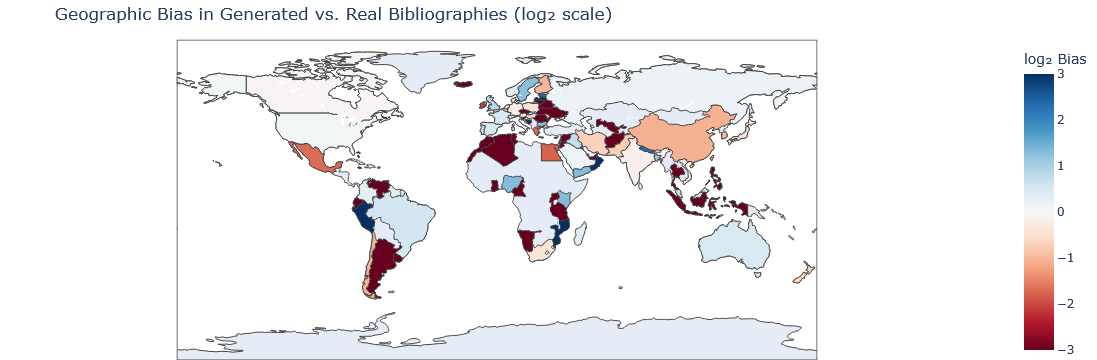

In [96]:
"""
This script analyzes geographic biases in citations between real and AI-generated bibliographies.

It loads bibliographic metadata where each entry contains country-level citation distributions 
for both real and generated references.

Main steps:
1. Load the metadata JSONL file containing real and generated country citation counts.
2. Aggregate the citation counts per country for both real and generated datasets.
3. Calculate smoothed frequencies of citations by country to avoid zero counts in later computations.
4. Compute the log base 2 ratio (log2 bias) of generated vs. real citation frequencies per country.
5. Resolve country names to standard ISO country names using the 'pycountry' library for consistency.
6. Cap extreme bias values to improve visualization clarity.
7. Plot a choropleth world map visualizing the log2 bias per country using Plotly Express.

This visualization helps identify countries that are over- or under-represented in AI-generated bibliographies 
compared to real bibliographies, providing insights into geographic biases in citation generation.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import plotly.express as px
from collections import Counter
import json

# Load full bibliographic metadata from JSONL file
with open("full_bibliography_metadata_qwen_3.jsonl", "r", encoding="utf-8") as f:
    # Read each line and parse JSON only if line is not empty
    data = [json.loads(line) for line in f if line.strip()]

# Initialize counters to accumulate citation counts by country
real_country_counter = Counter()
gen_country_counter = Counter()
total_real_refs = 0
total_gen_refs = 0

# Aggregate country citation counts across all metadata entries
for entry in data:
    # Safely access country distributions for real and generated bibliographies
    real_dist = entry.get("real_analysis", {}).get("country_distribution", {})
    gen_dist = entry.get("generated_analysis", {}).get("country_distribution", {})
    
    # Update the global counters with the counts from this entry
    real_country_counter.update(real_dist)
    gen_country_counter.update(gen_dist)
    
    # Track total counts to calculate frequencies later
    total_real_refs += sum(real_dist.values())
    total_gen_refs += sum(gen_dist.values())

# Determine minimum non-zero frequency in both real and generated data for smoothing
min_real_freq = min(v/total_real_refs for v in real_country_counter.values() if v > 0)
min_gen_freq = min(v/total_gen_refs for v in gen_country_counter.values() if v > 0)
# Set smoothing factor to a small fraction of the smallest frequency to avoid zero division
smoothing_factor = min(min_real_freq, min_gen_freq) / 100

bias_data = []
# Combine all countries seen in either dataset
all_countries = set(real_country_counter) | set(gen_country_counter)

# Calculate smoothed frequencies and log2 bias for each country
for country in all_countries:
    real_count = real_country_counter.get(country, 0)
    gen_count = gen_country_counter.get(country, 0)
    
    # Apply smoothing to counts and total to prevent division by zero
    real_freq = (real_count + smoothing_factor) / (total_real_refs + smoothing_factor * len(all_countries))
    gen_freq = (gen_count + smoothing_factor) / (total_gen_refs + smoothing_factor * len(all_countries))
    
    # Compute log2 ratio of generated frequency to real frequency
    log2_bias = np.log2(gen_freq / real_freq)
    
    # Attempt to standardize country name using pycountry's lookup
    try:
        iso_name = pycountry.countries.lookup(country).name
    except LookupError:
        # If no match found, keep original country string
        iso_name = country

    # Append dictionary of bias info for this country
    bias_data.append({
        "country": iso_name,
        "bias_log2_gen_vs_real": log2_bias,
        "real_freq": real_freq,
        "gen_freq": gen_freq,
        "raw_real_count": real_count,
        "raw_gen_count": gen_count
    })

# Convert list of dictionaries into a DataFrame for easier manipulation and plotting
bias_df = pd.DataFrame(bias_data)

# Clip extreme bias values to [-3, 3] to avoid distortion in color scale visualization
max_bias = 3
bias_df['bias_log2_gen_vs_real'] = bias_df['bias_log2_gen_vs_real'].clip(-max_bias, max_bias)

# Create an interactive choropleth map using Plotly Express
fig = px.choropleth(
    bias_df,
    locations="country",              # Country names for location
    locationmode="country names",    # Use country names to locate countries on the map
    color="bias_log2_gen_vs_real",   # Color scale based on log2 bias values
    color_continuous_scale="RdBu",   # Red-Blue diverging scale (red = overrepresented, blue = underrepresented)
    range_color=[-max_bias, max_bias],  # Fix color scale range for consistency
    title="Geographic Bias in Generated vs. Real Bibliographies (log₂ scale)",
    labels={"bias_log2_gen_vs_real": "log₂ Bias"},
    hover_data=["real_freq", "gen_freq", "raw_real_count", "raw_gen_count"]  # Additional info on hover
)

# Improve map aesthetics by showing coastlines and setting projection type
fig.update_geos(showcoastlines=True, projection_type="equirectangular")
# Remove default margins for better fit
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

# Display the interactive map
fig.show()
